# Pré-processamento de dados

Neste arquivo será realizado o pré-processamento de dados, bem como filtros temporais, espaciais e visualização de dados em gráficos.

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal

In [15]:
# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=250, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=250, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=250, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=250, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

### Visualização dos gráficos com e sem filtros

... explicação (**tarefa** completar a explicação).

In [16]:
def print_graphs(data):
    for i in range(data.shape[1]):
        plt.plot(data[:,i])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(data.shape[1]):
        plt.psd(data[:,i], Fs=250)
    plt.title('Domínio da frequência')
    plt.show()

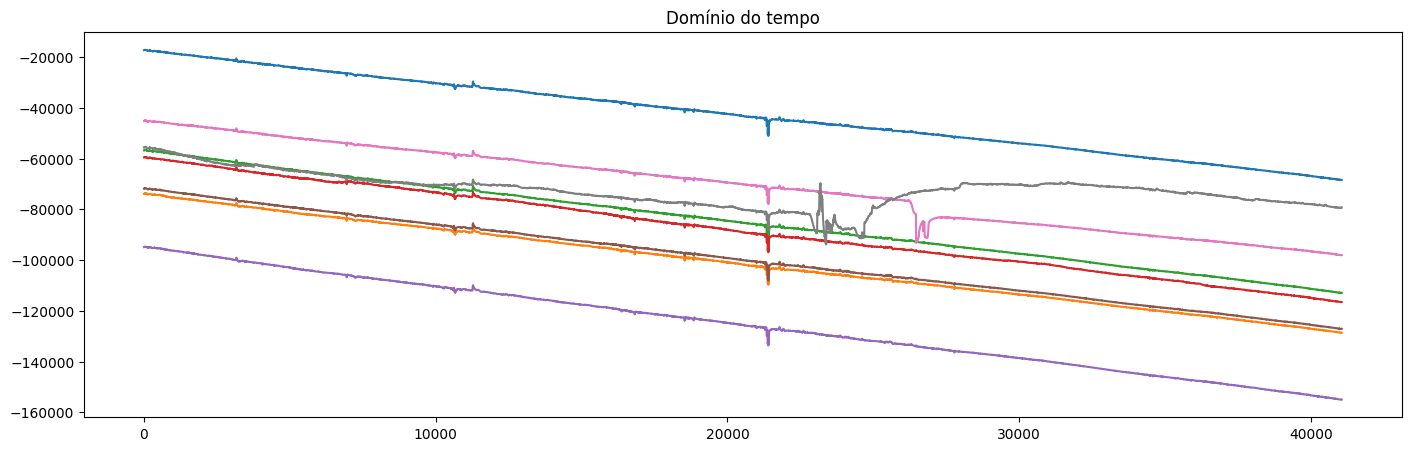

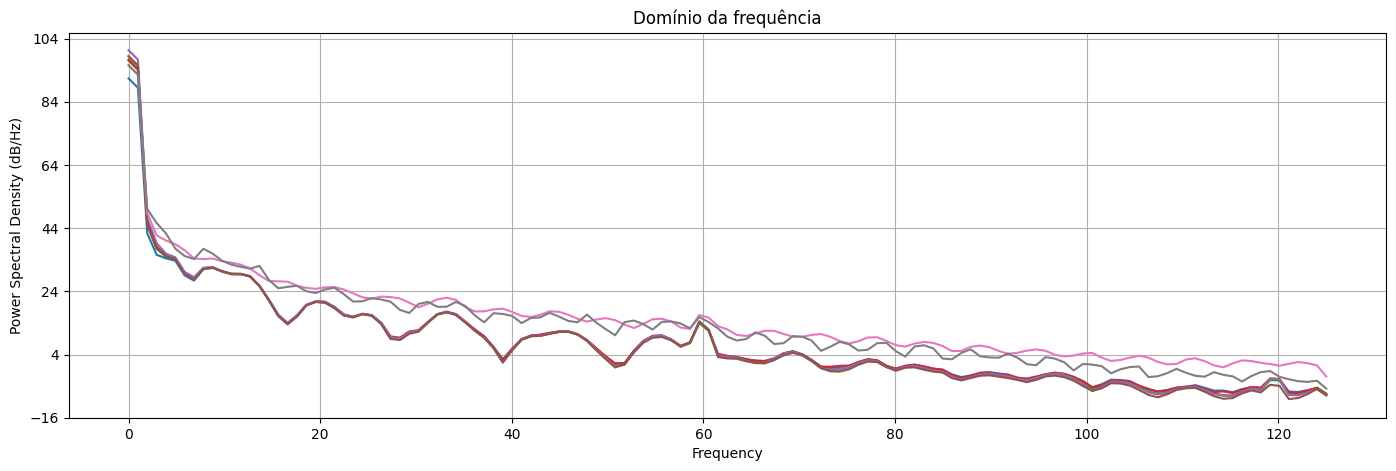

In [17]:
# Apresentação dos dados sem aplicação dos filtros.

data = np.load('../dataset/data.npy')

rcParams['figure.figsize'] = [17., 5.]
print_graphs(data)

### Aplicação do filtro Notch

Removendo principalmente dados de interferência da rede elétrica.

In [21]:
data_filtered = butter_notch(data, 60)
print_graphs(data_filtered)

KeyboardInterrupt: 

In [19]:
data_filtered = butter_highpass(data, 5, fs=250)
print_graphs(data_filtered)

ValueError: The length of the input vector x must be greater than padlen, which is 15.